In [67]:
import json as json
import pathlib as pl
from datetime import datetime
from os import path

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from numpy import array
from numpy.linalg import norm

gain = 1.5
rcParams[ 'figure.figsize' ] = [ gain * 6.4, gain * 4.8 / 2 ]

In [68]:
for v in pl.Path( "./plots" ).glob( '*' ):
	if datetime.fromtimestamp( path.getctime( v ) ).date() >= datetime.fromisocalendar( 2024, 37, 2 ).date():
		print( v, '\t\t', datetime.fromtimestamp( path.getctime( v ) ) )

plots\three_robots_chain_1725544746 		 2024-09-11 09:41:55.138689
plots\three_robots_chain_1725545719 		 2024-09-11 09:41:55.145694
plots\three_robots_chain_1725545748 		 2024-09-11 09:41:55.147693
plots\three_robots_chain_1725545834 		 2024-09-11 09:41:55.150694
plots\three_robots_chain_1726033948 		 2024-09-11 09:41:43.868196
plots\three_robots_chain_1726033954 		 2024-09-11 09:41:43.896760
plots\three_robots_chain_1726033959 		 2024-09-11 09:41:43.939101


In [69]:
folder = pl.Path( './plots/three_robots_chain_1726033948' )
data = pd.read_csv( f'{folder}/logs.txt', sep = '\t' )
with open( f'{folder}/config.json' ) as f:
	conf = json.load( f )
data[ 'time' ] = [ i * conf[ 'time_step' ] for i in data.index ]

In [70]:
def disp( d: dict, prefix: str = '' ):
	for k, v in d.items():

		if isinstance( v, dict ):
			print( prefix + k + ':' )
			disp( v, prefix + '\t' )
			continue

		if isinstance( v, list ):
			if len( v ) > 0 and isinstance( v[ 0 ], dict ):
				print( prefix + k + ':' )
				disp( { str( i ): e for i, e in enumerate( v ) }, prefix + '\t' )
				continue

			l = array( v ).shape
			print( prefix + k + ':', v if sum( l ) < 10 else l )
			continue

		print( prefix + k + ':', v )


disp( conf )

model_dynamics: three_robots_chain
time_step: 0.01
kwargs:
	weight: [0.0, 0.0, 112.81500000000001]
	buoyancy: [0.0, 0.0, -120.0]
	center_of_mass: [0.0, 0.0, 0.0]
	center_of_volume: [0.0, 0.0, -0.02]
	inverted_inertial_matrix: (6, 6)
	hydrodynamic_matrix: (6, 6)
state: (36,)
actuation: (18,)
record: True
previous_states: (1, 36)
previous_actuations: (1, 18)
model: None
horizon: 25
target_trajectory: (4000, 1, 18)
objective: None
time_steps_per_actuation: 25
guess_from_last_solution: True
tolerance: 0.0001
max_iter: 1000
bounds: None
constraints:
	0:
		fun: constraint_f
		lb: (225,)
		ub: (225,)
		finite_diff_rel_step: None
		finite_diff_jac_sparsity: None
		jac: 2-point
		hess: None
		keep_feasible: False
result_shape: [1, 1, 18]
raw_result: None
result: (1, 1, 18)
pose_weight_matrix: (25, 18, 18)
actuation_derivative_weight_matrix: (1, 18, 18)
objective_weight: 0.0
final_weight: 10.0
predicted_trajectories: []
candidate_actuations: []
times: []
verbose: False


In [71]:
conf[ 'constraints' ][ 0 ][ 'ub' ][ :225 // 25 ]

[3.1, 3.1, 2.8, 2.8, 2.8, 2.8, 3.0, 3.0, 3.0]

In [72]:
conf[ 'constraints' ][ 0 ][ ('lb') ][ :225 // 25 ]

[-inf, -inf, 0.4, 0.4, -inf, -inf, -inf, -inf, -inf]

In [73]:
data.tail( 10 )

,index,sim_time,step_time,success,C01,C12,D01,D12,H01,H12,...,state_r1,state_r2,speed_r0,speed_r1,speed_r2,actuation_r0,actuation_r1,actuation_r2,Unnamed: 19,time
1990,1990,4197.803431,0.314091,True,0.941094,1.561901,1.195013,0.689532,0.745845,0.408612,...,"[-0.35084202616998955, -0.6322931949172537, -0.060233771674857536, 0.0009146157511792796, -0.0005717679773847116, -0.0015211456326181035]","[1.493873668095354, -0.07140814905490077, -1.27311128573779, 0.0005374499542365024, 0.0001426490258281145, -0.0010373501207181998]","[-0.021412369917735628, 0.017028226668893358, 0.000988841137950994, -0.010507300760734644, 0.0028306149675863005, -0.0010174362474501648]","[-0.27619393880958437, 0.3591954469469282, -0.5191878349122314, 0.0009388147450293649, -0.0025536639476665787, -0.01129904905526739]","[-0.2595535005719836, 0.012818235602121223, -0.7378092500739323, 0.005327141497377255, 0.006186814367964064, -0.003478979894537417]","[5.348111030656662, -2.2168030331843713, 7.240912317627618, 0.008145510751975234, -0.00896052953972828, -0.005799142801245039]","[-62.75967995166576, -16.138990663119564, 72.82994656744971, -0.005145986441704286, 0.0025517102198259253, 0.009653512560306369]","[-56.36029272818109, 69.32802030566872, 73.35059844190693, -0.0017152108612192598, -0.002863525026415183, 0.005380083117795093]",NaN,19.90
1991,1991,4198.179551,0.343581,True,0.938583,1.562554,1.194137,0.688725,0.742245,0.407769,...,"[-0.3537901498472592, -0.6288298184355248, -0.0650695848244098, 0.0009218042612539381, -0.0005959946124610799, -0.0016311909105721026]","[1.4910900703286067, -0.0710011224131612, -1.28013052345492, 0.0005897942217856808, 0.0002035847698196996, -0.0010704311389681373]","[-0.01622419644777097, 0.015463823912910579, 0.0010325620897711904, -0.009795479590974873, 0.001982368723310648, -0.001378426445145986]","[-0.3151089431139846, 0.33163547019478784, -0.4482111479169149, 0.00048552443062618183, -0.002311095138032755, -0.01070510984219106]","[-0.29703115045943657, 0.06725808562129093, -0.6661271354870355, 0.005141411204479221, 0.005994942279767531, -0.0031438473939354714]","[6.028038291522235, -1.9107978004068653, 7.230021762540433, 0.008532311795012421, -0.008995539633267338, -0.005691997181801051]","[-43.556628856499756, -33.83593465508676, 91.31388716050371, -0.005097904795733036, 0.0026495957296524086, 0.0102731881286832]","[-41.97906827198099, 62.36099335532113, 93.25576514108073, -0.001985069937281432, -0.0030805088119241542, 0.005593927517716583]",NaN,19.91
1992,1992,4198.518406,0.309909,True,0.935486,1.562702,1.193740,0.687958,0.738755,0.406821,...,"[-0.3570451136333796, -0.6257197472632, -0.06911410767031492, 0.0009244595196400406, -0.0006177471612295589, -0.0017350876872188664]","[1.4879939807010523, -0.07007827898305204, -1.286344072352275, 0.000640152645874297, 0.0002624840020755265, -0.0011000846902156352]","[-0.010425407757937464, 0.014158362771601271, 0.0010669901994010986, -0.00904158777638798, 0.0011252343995347364, -0.0017342881633729535]","[-0.33743310446007246, 0.2884956568884187, -0.36080479060610265, 3.251819237229411e-05, -0.002057874067429262, -0.010069751884596382]","[-0.3221126404752849, 0.11591816251739982, -0.5767735294566715, 0.0049302405578790075, 0.005779627350119096, -0.0027938509224210914]","[6.707965552387808, -1.6047925676293593, 7.219131207453248, 0.008919112838049609, -0.009030549726806397, -0.005584851562357062]","[-24.35357776133375, -51.532878647053955, 109.79782775355771, -0.0050498231497617865, 0.002747481239478892, 0.010892863697060032]","[-27.597843815780895, 55.39396640497354, 113.16093184025453, -0.002254929013343604, -0.0032974925974331255, 0.005807771917638074]",NaN,19.92
1993,1993,4199.045460,0.495767,True,0.931965,1.562380,1.193827,0.687231,0.735529,0.405782,...,"[-0.36044123806664685, -0.6231196289384349, -0.07220273405615017, 0.000922603173835927, -0.0006369324598213588, -0.001832453636626214]","[1.4847097003933, -0.06869791540725723, -1.2915748134911331, 0.00068828400786713

In [74]:
state_r0 = data[ 'state_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r1 = data[ 'state_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r2 = data[ 'state_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

speed_r0 = data[ 'speed_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r0[ 'l_norm' ] = norm( speed_r0[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r0[ 'a_norm' ] = norm( speed_r0[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

speed_r1 = data[ 'speed_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r1[ 'l_norm' ] = norm( speed_r1[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r1[ 'a_norm' ] = norm( speed_r1[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

speed_r2 = data[ 'speed_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r2[ 'l_norm' ] = norm( speed_r2[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r2[ 'a_norm' ] = norm( speed_r2[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

actuation_r0 = data[ 'actuation_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r1 = data[ 'actuation_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r2 = data[ 'actuation_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

n_frames = len( conf[ 'target_trajectory' ] )
traj = array( conf[ 'target_trajectory' ] )[ :n_frames // 2, :, : ]

# Errors

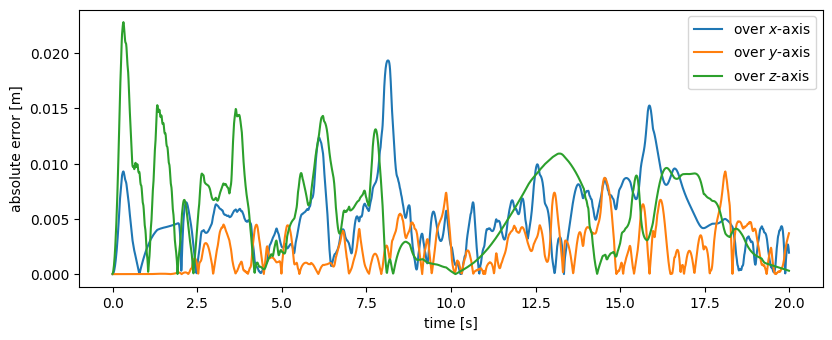

In [75]:
plt.plot( data[ 'time' ], abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] ) )
plt.legend( [ 'over $x$-axis', 'over $y$-axis', 'over $z$-axis' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'absolute error [m]' )
plt.savefig( f'{folder}/error.png', dpi = 300 )

In [76]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).describe()

,x,y,z
count,2.000000e+03,2.000000e+03,2000.000000
mean,5.123836e-03,2.193665e-03,0.005670
std,3.247755e-03,1.986867e-03,0.004201
min,7.508741e-09,6.925183e-16,0.000007
25%,2.972638e-03,5.407261e-04,0.001809
50%,4.623855e-03,1.636758e-03,0.005459
75%,6.729842e-03,3.653658e-03,0.008708
max,1.931712e-02,9.280758e-03,0.022785


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

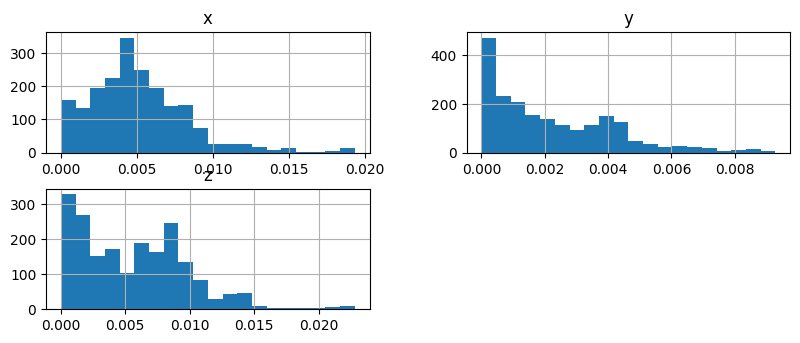

In [77]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).hist( bins = 20 )

<Axes: >

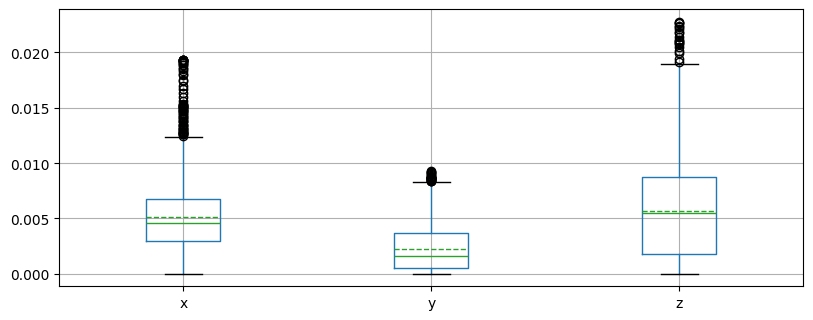

In [78]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).boxplot( meanline = True, showmeans = True )

In [79]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).describe()

,0
count,2000.000000
mean,0.008791
std,0.004250
min,0.000031
25%,0.005621
50%,0.009047
75%,0.011423
max,0.024604


array([[<Axes: title={'center': '0'}>]], dtype=object)

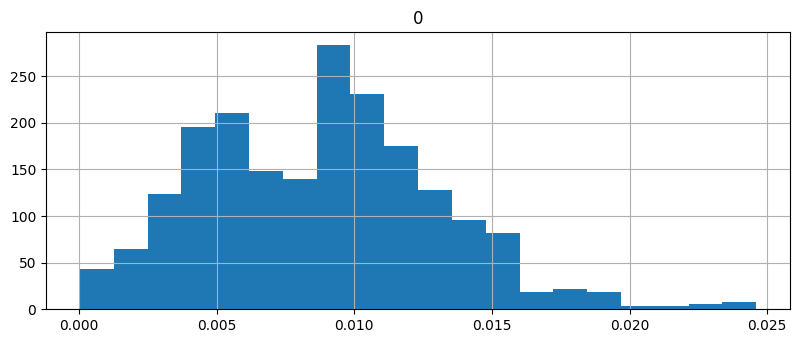

In [80]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).hist( bins = 20 )

<Axes: >

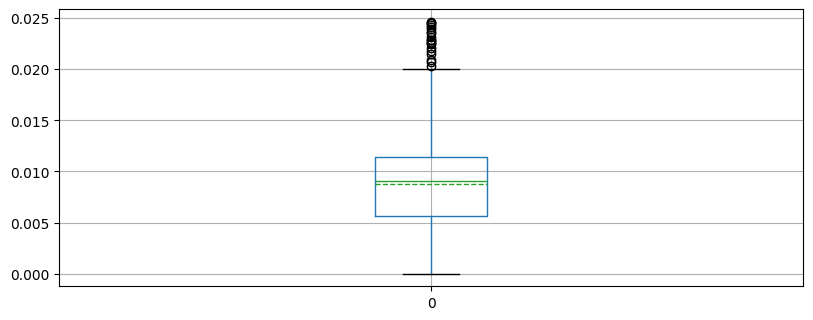

In [81]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).boxplot(
		meanline = True,
		showmeans = True
		)

# Constraints

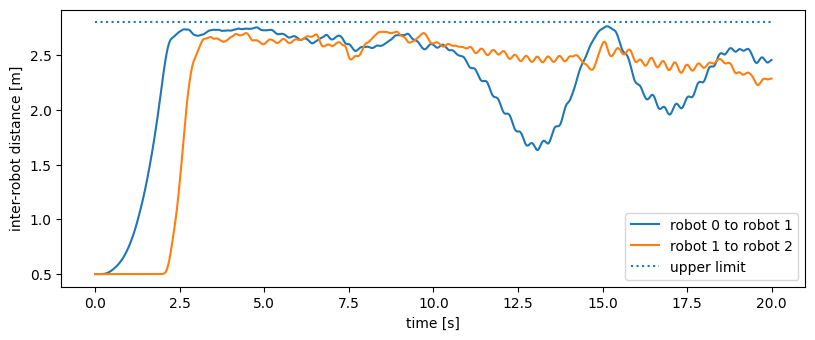

In [82]:
plt.plot(data[ 'time' ], norm( state_r1[ [ 'x', 'y', 'z' ] ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) )
plt.plot(data[ 'time' ], norm( state_r2[ [ 'x', 'y', 'z' ] ] - state_r1[ [ 'x', 'y', 'z' ] ], axis = 1 ) )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 4 ], 0, data['time'].max(), linestyles = ':' )
plt.legend( [ 'robot 0 to robot 1', 'robot 1 to robot 2', 'upper limit' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'inter-robot distance [m]' )
plt.savefig( f'{folder}/inter_robot_distance.png', dpi = 300 )

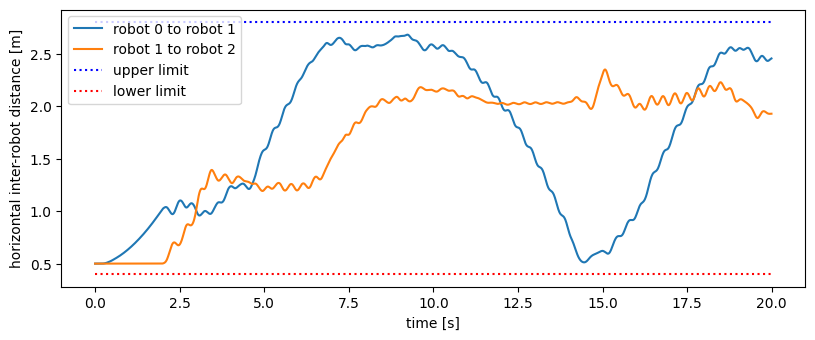

In [83]:
plt.plot(data[ 'time' ], norm( state_r1[ [ 'x', 'y' ] ] - state_r0[ [ 'x', 'y' ] ], axis = 1 ) )
plt.plot(data[ 'time' ], norm( state_r2[ [ 'x', 'y' ] ] - state_r1[ [ 'x', 'y' ] ], axis = 1 ) )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 2 ], 0, data['time'].max(), linestyles = ':', color = 'b' )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'lb' ][ 2 ], 0, data['time'].max(), linestyles = ':', color = 'r' )
plt.legend( [ 'robot 0 to robot 1', 'robot 1 to robot 2', 'upper limit', 'lower limit' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'horizontal inter-robot distance [m]' )
plt.savefig( f'{folder}/horizontal_inter_robot_distance.png', dpi = 300 )

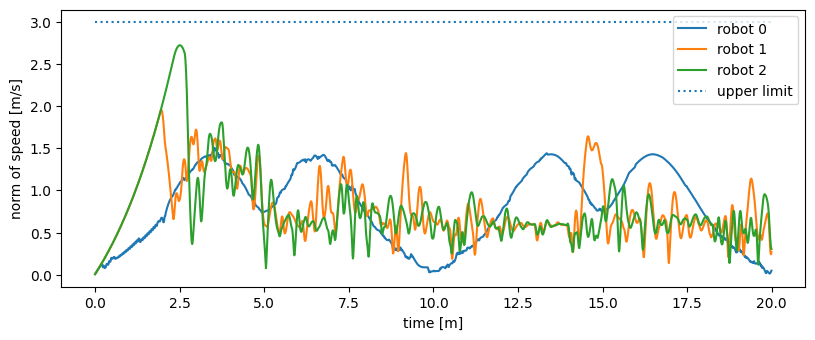

In [84]:
plt.plot(data['time'], speed_r0[ 'l_norm' ])
plt.plot(data['time'], speed_r1[ 'l_norm' ])
plt.plot(data['time'], speed_r2[ 'l_norm' ])
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 6 ], 0, data['time'].max(), linestyles = ':' )
plt.legend( [ 'robot 0', 'robot 1', 'robot 2', 'upper limit' ] )
plt.xlabel( 'time [m]' )
plt.ylabel( 'norm of speed [m/s]' )
plt.savefig( f'{folder}/robots_speed.png', dpi = 300 )

# States

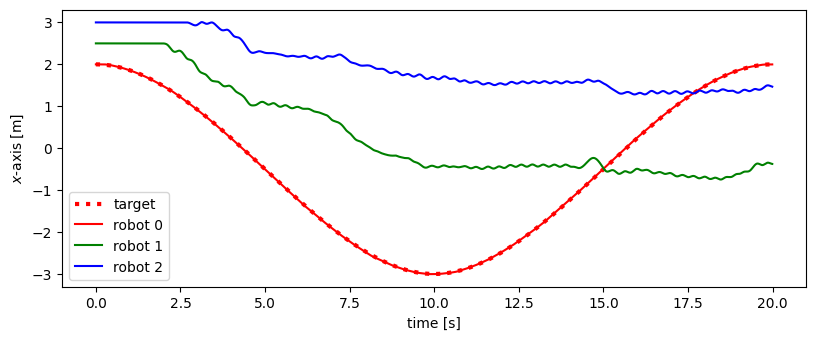

In [85]:
plt.plot(data[ 'time' ], traj[ :, 0, 0 ], ':', color = 'r', linewidth = 3 )
plt.plot(data[ 'time' ], state_r0[ 'x' ], 'r' )
plt.plot(data[ 'time' ], state_r1[ 'x' ], 'g' )
plt.plot(data[ 'time' ], state_r2[ 'x' ], 'b' )

plt.legend( [ 'target', 'robot 0', 'robot 1', 'robot 2' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( '$x$-axis [m]' )
plt.savefig( f'{folder}/pose_x.png', dpi = 300 )

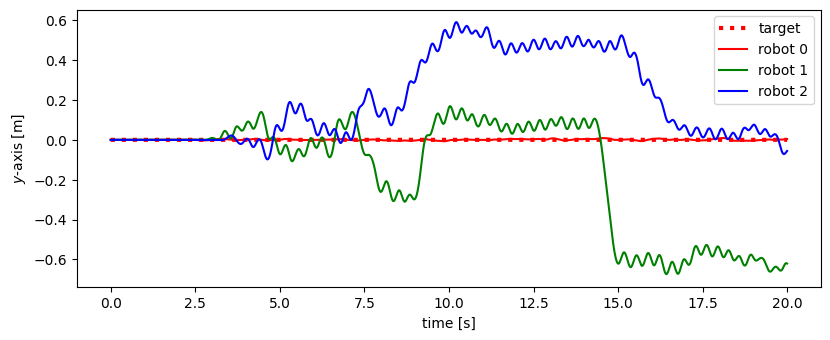

In [86]:
plt.plot(data[ 'time' ], traj[ :, 0, 1 ], ':', color = 'r', linewidth = 3 )
plt.plot(data[ 'time' ], state_r0[ 'y' ], 'r' )
plt.plot(data[ 'time' ], state_r1[ 'y' ], 'g' )
plt.plot(data[ 'time' ], state_r2[ 'y' ], 'b' )

plt.legend( [ 'target', 'robot 0', 'robot 1', 'robot 2' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( '$y$-axis [m]' )
plt.savefig( f'{folder}/pose_y.png', dpi = 300 )

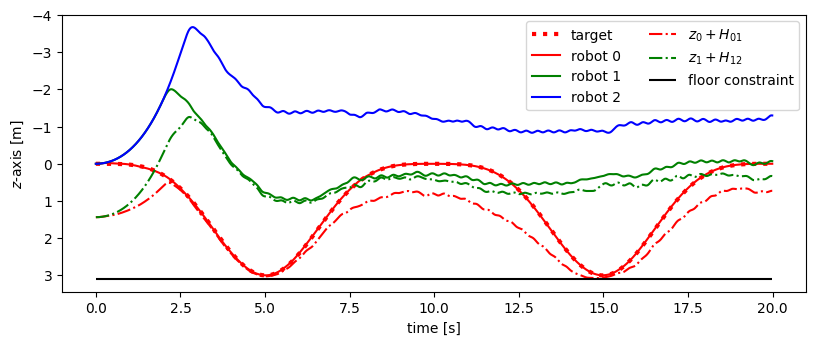

In [87]:
plt.plot(data[ 'time' ], traj[ :, 0, 2 ], ':', color = 'r', linewidth = 3 )
plt.plot(data[ 'time' ], state_r0[ 'z' ], 'r' )
plt.plot(data[ 'time' ], state_r1[ 'z' ], 'g' )
plt.plot(data[ 'time' ], state_r2[ 'z' ], 'b' )
plt.plot(data[ 'time' ], data[ 'H01' ] + state_r0[ 'z' ], '-.', color = 'r' )
plt.plot(data[ 'time' ], data[ 'H12' ] + state_r1[ 'z' ], '-.', color = 'g' )

plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 0 ], 0, data[ 'time' ].max(), 'k' )
plt.legend(
		[ 'target', 'robot 0', 'robot 1', 'robot 2', '$z_0 + H_{01}$', '$z_1 + H_{12}$', 'floor constraint' ],
		ncol = 2
		)
plt.gca().invert_yaxis()
plt.xlabel( 'time [s]' )
plt.ylabel( '$z$-axis [m]' )
plt.savefig( f'{folder}/pose_z.png', dpi = 300 )

# Speeds

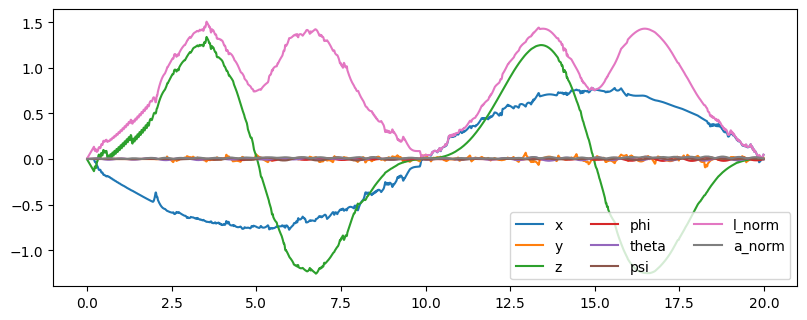

In [88]:
plt.plot(data[ 'time' ], speed_r0)
plt.legend( speed_r0.columns, ncol = 3 )
plt.savefig( f'{folder}/speed_r0.png', dpi = 300 )

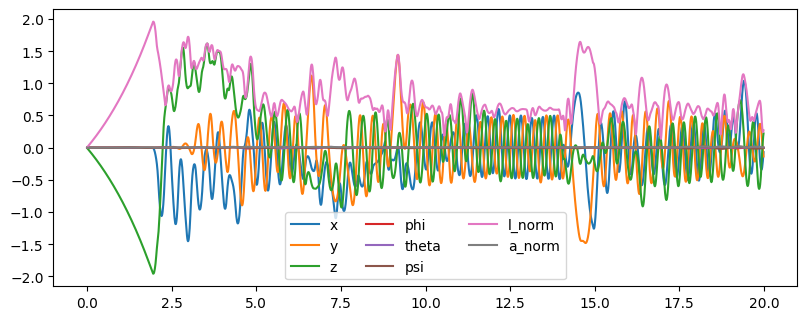

In [89]:
plt.plot(data[ 'time' ], speed_r1)
plt.legend(speed_r1.columns, ncol = 3 )
plt.savefig( f'{folder}/speed_r1.png', dpi = 300 )

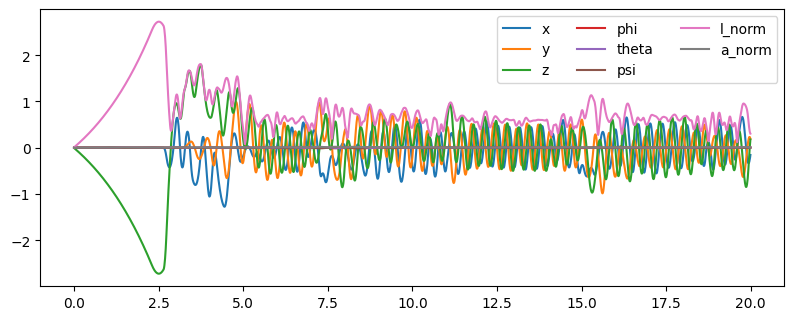

In [90]:
plt.plot(data[ 'time' ], speed_r2)
plt.legend(speed_r2.columns, ncol = 3 )
plt.savefig( f'{folder}/speed_r2.png', dpi = 300 )

# Actuations

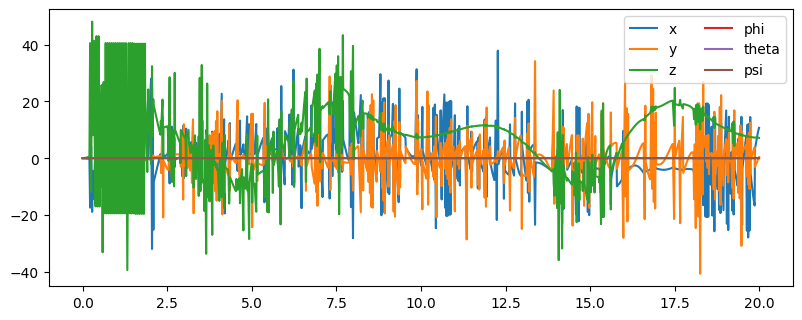

In [91]:
plt.plot(data[ 'time' ], actuation_r0)
plt.legend(actuation_r0.columns, ncol = 2 )
plt.savefig( f'{folder}/actuation_r0.png', dpi = 300 )

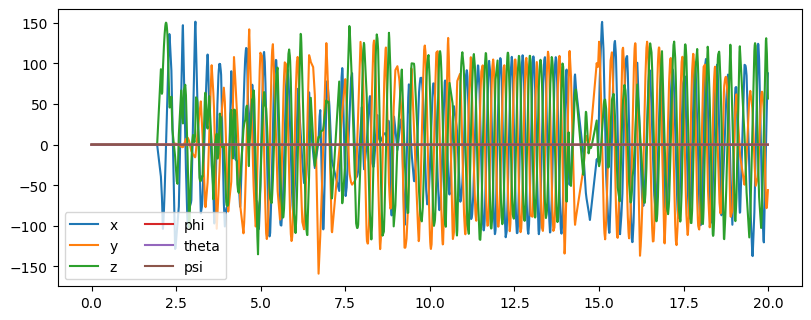

In [92]:
plt.plot(data[ 'time' ], actuation_r1)
plt.legend(actuation_r1.columns, ncol = 2 )
plt.savefig( f'{folder}/actuation_r1.png', dpi = 300 )

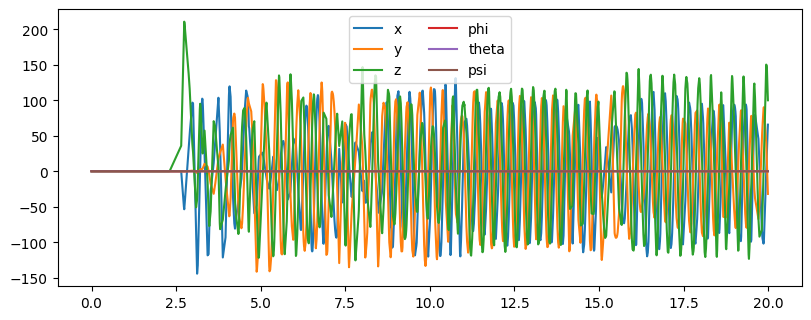

In [93]:
plt.plot(data[ 'time' ], actuation_r2)
plt.legend(actuation_r2.columns, ncol = 2 )
plt.savefig( f'{folder}/actuation_r2.png', dpi = 300 )

# Time

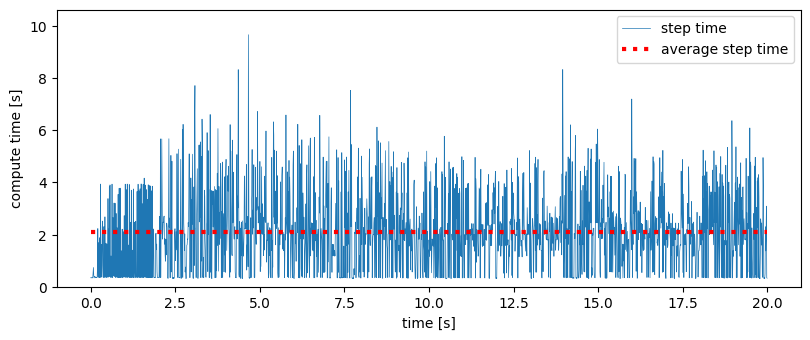

In [94]:
plt.plot(data[ 'time' ], data[ 'step_time' ], linewidth = .5 )
plt.hlines( data.step_time.mean(), 0, data[ 'time' ].max(), linestyles = ':', color = 'r', linewidth = 3 )
plt.ylabel( 'compute time [s]' )
plt.xlabel( 'time [s]' )
plt.gca().set_ylim( 0, data.step_time.max() * 1.1 )
plt.legend( [ 'step time', 'average step time' ] )
plt.savefig( f'{folder}/compute_time.png', dpi = 300 )

In [95]:
data[ 'step_time' ].describe()

count    2000.000000
mean        2.087203
std         1.519445
min         0.307595
25%         0.551655
50%         2.002808
75%         2.904974
max         9.662321
Name: step_time, dtype: float64

<Axes: >

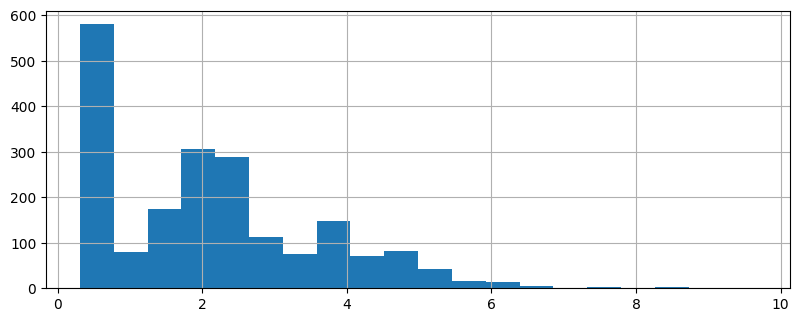

In [96]:
data[ 'step_time' ].hist( bins = 20 )

<Axes: >

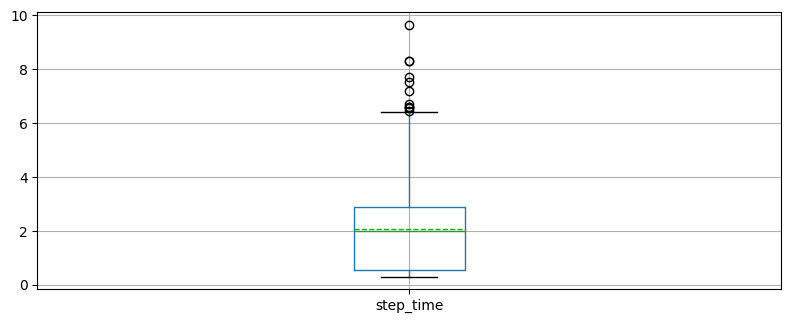

In [97]:
data[ 'step_time' ].to_frame().boxplot( meanline = True, showmeans = True )

In [98]:
for v in pl.Path( "./plots" ).glob( '*' ):
	if datetime.fromtimestamp( path.getctime( v ) ).date() >= datetime.fromisocalendar( 2024, 37, 2 ).date():
		print( v, end = '\t' )
		print( datetime.fromtimestamp( path.getctime( v ) ), end = '\t' )
		try:
			record = pd.read_csv( f'{v}/logs.txt', sep = '\t' ).shape[ 0 ]
			with open( f'{v}/config.json' ) as f:
				conf = json.load( f )
		except:
			continue
		planned = array( conf[ 'target_trajectory' ] ).shape[ 0 ] // 2
		print( f'{record=}\t{planned=}\t{record == planned}' )

plots\three_robots_chain_1725544746	2024-09-11 09:41:55.138689	plots\three_robots_chain_1725545719	2024-09-11 09:41:55.145694	plots\three_robots_chain_1725545748	2024-09-11 09:41:55.147693	plots\three_robots_chain_1725545834	2024-09-11 09:41:55.150694	plots\three_robots_chain_1726033948	2024-09-11 09:41:43.868196	record=2000	planned=2000	True
plots\three_robots_chain_1726033954	2024-09-11 09:41:43.896760	record=2000	planned=2000	True
plots\three_robots_chain_1726033959	2024-09-11 09:41:43.939101	record=2000	planned=2000	True
